---

# <center> Machine Learning | Linear Regression | Project | Markeing Budget Estimation 

---

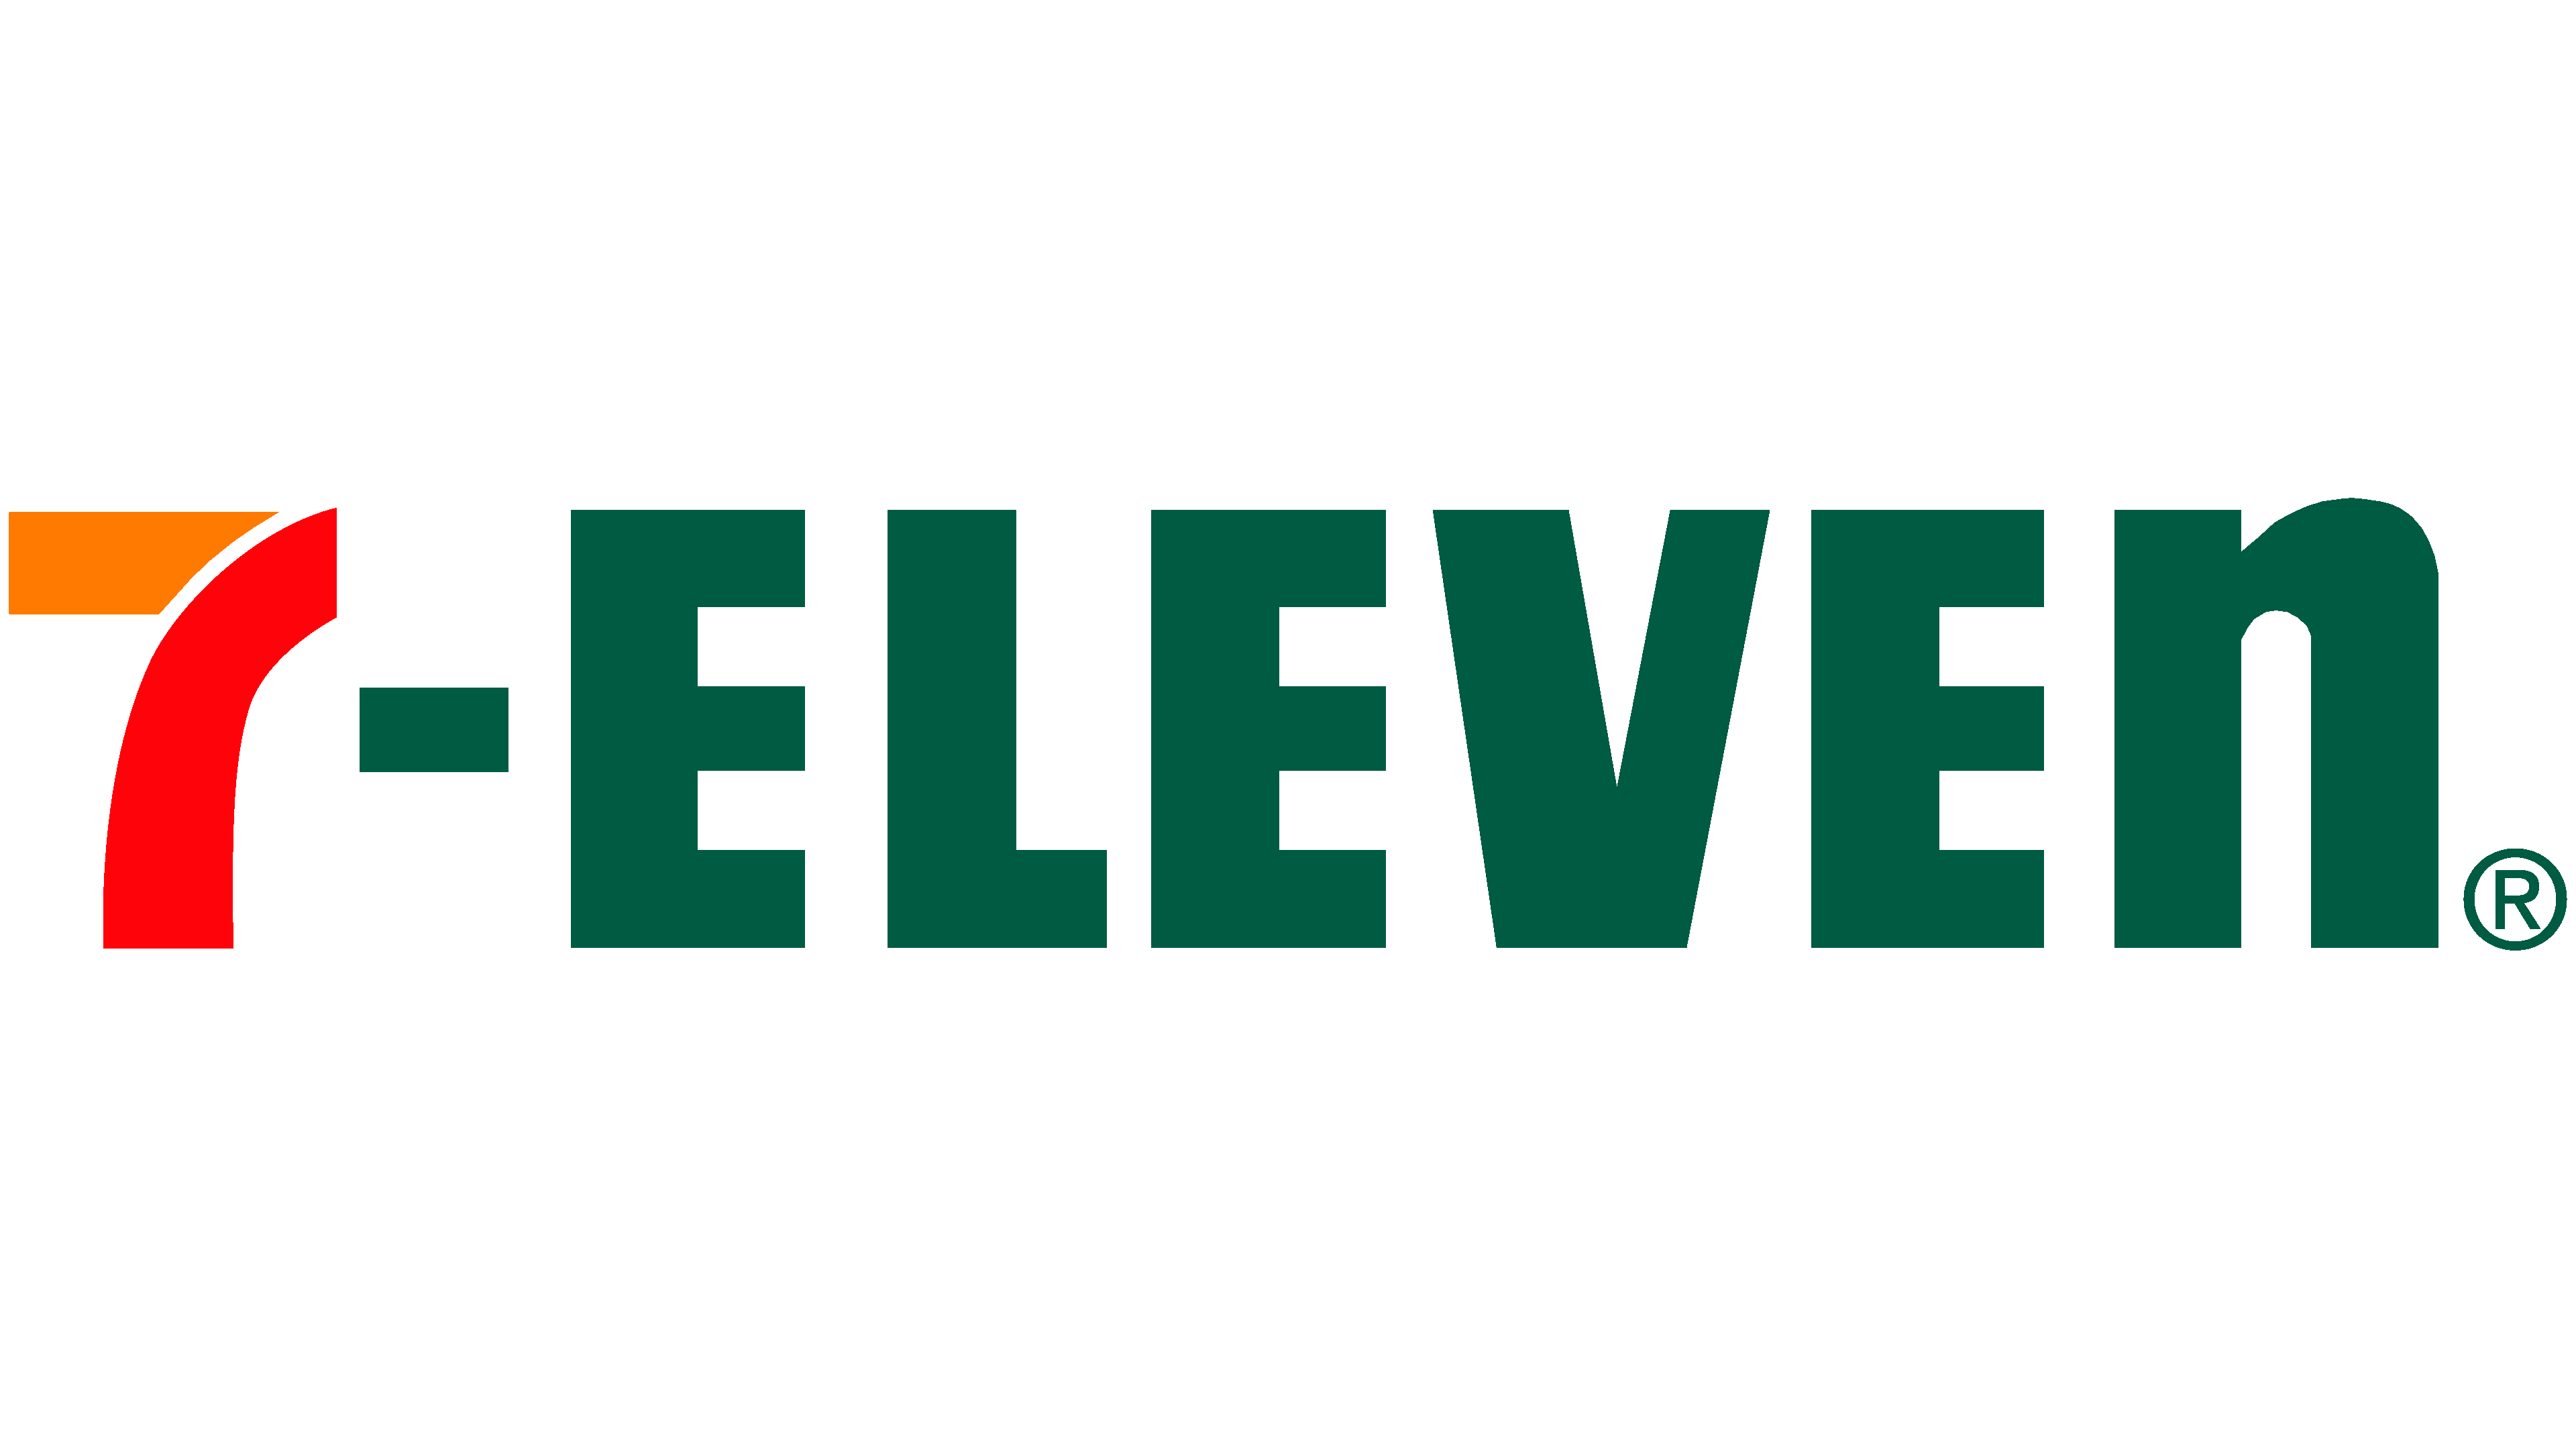

In [428]:
from IPython import display 
display.Image('https://logos-world.net/wp-content/uploads/2021/08/7-Eleven-Emblem.png')

---

### Description:

7-Eleven is one of the world's major retail stores with a strong presence in US as well. But currently, the company has a problem with understanding demand patterns which leads to inventory and budget allocation related issues. In order to address the same, the company has tasked us with devising a model which can predict the upcoming demand (sales) in a fairly accurate manner. 
 
 
The data consists of sales for 45 country-wide stores located in different regions.
7-Eleven runs promotions throughtout the year which include Super Bowl, Labour Day, Thanksgiving, and Christmas. 

Dataset information:\

This data contains sales and realted information from 2010-02-05 to 2012-11-01, in the file seven_eleven_sales. There are following fields in the file :\

* Store - Store #
* Date - Sale date
* Weekly_Sales -  sales for the store on a given date
* Holiday_Flag - 1/0 depending on holiday period or not
* Temperature - Temperature on the sale day
* Fuel_Price - Fuel price on sale day in that region
* CPI – current consumer price index
* Unemployment - current unemployment rate
* Holiday Events\
Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13\
Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13\
Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13\
Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13


### Objective:
- Understand the problem and the data
- Clean up and transform data as per requirement
- Build a Linear Regression model and predict sales for upcoming time period 
- Measure the performance of the model 

---

# <center> Steps towards buiding a Solution

** In this notebook, we'll go through following sections - 

1. Setting up libraries & Ingesting Data
2. Data Wrangling & EDA
3. Feature Engineering 
    * Data Manipulation
    * Feature Scaling
    * Feature Selection
4. Modelling using Multiple Linear Regression
5. Summary

---

# <center>1. Setting up libraries & Ingesting Data

Importing the basic librarires

In [429]:


import os                                        # for customising home directory
import math                
import numpy as np
import pandas as pd
import seaborn as sns                            # for plots                  


from statsmodels.formula import api                # library used for model training ( better statisics)
from sklearn.linear_model import LinearRegression  # Another library used for model training 
from sklearn.feature_selection import RFE          # library used to reduce collinearity and feature selection
from sklearn.preprocessing import StandardScaler   # used for Standardasing
from sklearn.model_selection import train_test_split # used for train/test splits

from IPython.display import display # function used to render appropriate mehod to display objects # new function in week


from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error # used for performance metrics

import matplotlib.pyplot as plt # used for plotting
import warnings # used to set how much warnings should be displayed
warnings.filterwarnings('ignore')




Setting the default figure size for notebook

In [430]:
plt.rcParams['figure.figsize'] = [10,6] 

In [431]:
print('Current working directory is ----    '+ os.getcwd())
os.chdir("D:\\Relevel\\Week 14_Day2\\Data")
print('Changed working directory is ----    '+ os.getcwd())

Current working directory is ----    D:\Relevel\Week 14_Day2\Data
Changed working directory is ----    D:\Relevel\Week 14_Day2\Data


Importing the dataset

In [432]:
sales = pd.read_csv('D:\\Relevel\\Week 14_Day2\\Data\\seven_eleven_sales.csv')


display(sales.head())

original_sales = sales.copy(deep=True)

print('\n\033[1mFindings:\033[0m The given sales data consists of {} data entries (rows) across {} columns.'.format(sales.shape[0], sales.shape[1]))

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106



Findings: The given sales data consists of 6435 data entries (rows) across 8 columns.


In [433]:
#Checking unique values across each column to ge more insights into features, specially categorical features

original_sales.nunique().sort_values()

Holiday_Flag       2
Store             45
Date             143
Unemployment     349
Fuel_Price       892
CPI             2145
Temperature     3528
Weekly_Sales    6435
dtype: int64

---

# <center> 2. Data Wrangling & EDA

##### Treating Date Variable 

In [434]:
# Dissecting data column into Day, Month , Year columns for easier EDA

sales.Date=pd.to_datetime(sales.Date)

sales['weekday'] = sales.Date.dt.weekday
sales['month'] = sales.Date.dt.month
sales['year'] = sales.Date.dt.year

sales.drop(['Date'], axis=1, inplace=True)#,'month'
sales.head()




,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,weekday,month,year
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,6,5,2010
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,3,12,2010
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,4,2,2010
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,4,2,2010
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,0,5,2010


In [435]:
# getting a list of features in our data 

target = 'Weekly_Sales'

features = [i for i in sales.columns if i not in [target]]
original_sales = sales.copy(deep=True)

features

['Store',
 'Holiday_Flag',
 'Temperature',
 'Fuel_Price',
 'CPI',
 'Unemployment',
 'weekday',
 'month',
 'year']

Checking for NULLS and analysing datatypes of all columns

In [436]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Weekly_Sales  6435 non-null   float64
 2   Holiday_Flag  6435 non-null   int64  
 3   Temperature   6435 non-null   float64
 4   Fuel_Price    6435 non-null   float64
 5   CPI           6435 non-null   float64
 6   Unemployment  6435 non-null   float64
 7   weekday       6435 non-null   int64  
 8   month         6435 non-null   int64  
 9   year          6435 non-null   int64  
dtypes: float64(5), int64(5)
memory usage: 502.9 KB


##### 5 Point Summary

In [437]:
# Getting the 5 point summary for all numerical variables

display(sales.describe())

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,weekday,month,year
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151,3.573427,6.475524,2010.965035
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885,1.426581,3.321797,0.797019
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000,0.000000,1.000000,2010.000000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000,4.000000,4.000000,2010.000000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000,4.000000,6.000000,2011.000000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000,4.000000,9.000000,2012.000000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000,6.000000,12.000000,2012.000000


*Findings* : 

The data seems to be fairly accurate. There might be a few outliers which we'll inspect soon but overall the numbers seem reasonable. 

##### Duplicates & Null Value checks

In [438]:
# Checking if the data has duplicates

duplicate_count = 0
rows,cols = original_sales.shape

sales.drop_duplicates(inplace=True)

if sales.shape==(rows,cols):
    print("No duplicates")
else:
    print('Duplicates removed ---> '+ str(rows-sales.shape[0]))

No duplicates


In [439]:
# Checking for Null Values

null_cnt = pd.DataFrame(sales.isnull().sum().sort_values(), columns=['Total Null Values'])
null_cnt['Percentage'] = round(null_cnt['Total Null Values']/sales.shape[0],3)*100
print('Total null values - ' + str(null_cnt))

Total null values -               Total Null Values  Percentage
Store                         0         0.0
Weekly_Sales                  0         0.0
Holiday_Flag                  0         0.0
Temperature                   0         0.0
Fuel_Price                    0         0.0
CPI                           0         0.0
Unemployment                  0         0.0
weekday                       0         0.0
month                         0         0.0
year                          0         0.0


We can see that there are no Null values in the data

Checking unique values across each column to ge more insights into features, specially categorical features -

In [440]:
sales.nunique().sort_values()

Holiday_Flag       2
year               3
weekday            7
month             12
Store             45
Unemployment     349
Fuel_Price       892
CPI             2145
Temperature     3528
Weekly_Sales    6435
dtype: int64

Checking number of Categorical and Numerical features -

In [441]:
# Since we know that there are 45 stores, hence setting 45 as threshhold in below funcion

unique = sales[features].nunique().sort_values()
num_f = []
cat_f = []; 

for i in range(sales[features].shape[1]):
    if unique.values[i]<=45:cat_f.append(unique.index[i])
    else: num_f.append(unique.index[i])

print('\n\033[1mFindings:\033[0m The Datset has {} numerical & {} categorical features.'.format(len(num_f),len(cat_f)))


Findings: The Datset has 4 numerical & 5 categorical features.


### <center> Univariate Analysis of Target Variable

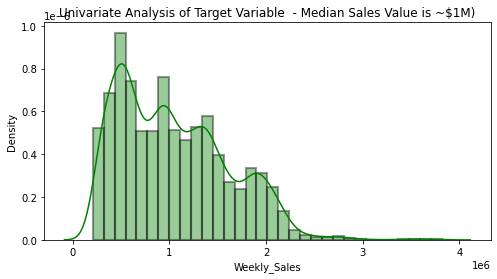

In [442]:
plt.figure(figsize=[8,4])
sns.distplot(sales[target], color='g',hist_kws=dict(edgecolor="black", linewidth=2.1), bins=32)
plt.title('Univariate Analysis of Target Variable  - Median Sales Value is ~$1M)')
plt.show()

**Finding:** The Target Variable seems to be be slightly right skewed, meaning there are more instances of sales at lower values than at higher. This is an expected and very common behaviour of sales data. 

### <center> Univariate Analysis of categorical features

                                   Univariate Analysis of categorical features :                                    


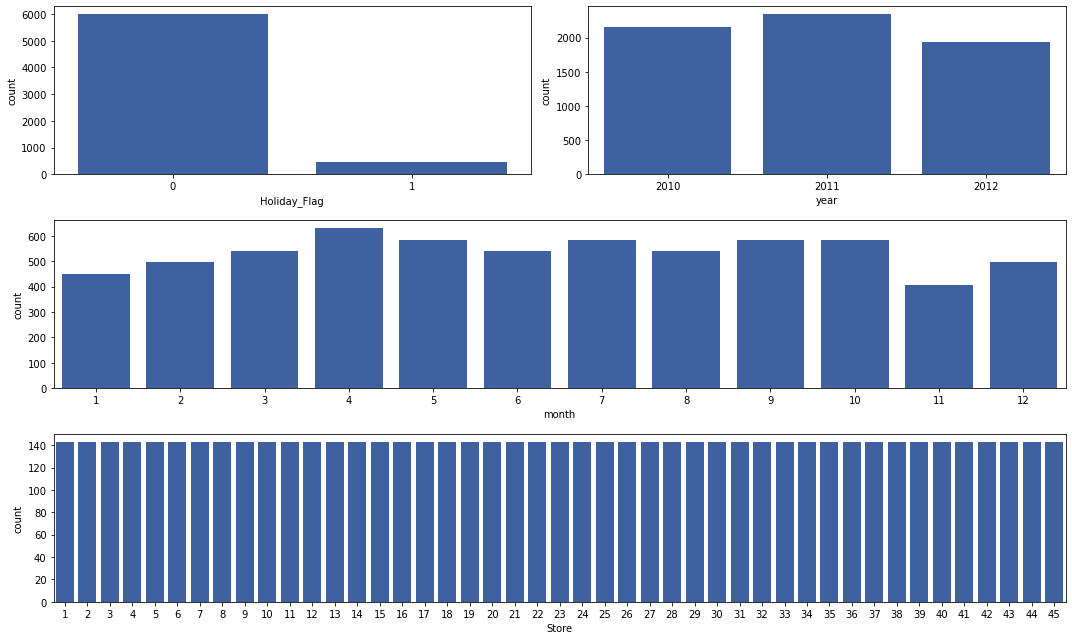

In [443]:
print('\033[1mUnivariate Analysis of categorical features :'.center(120))

n=2
plt.figure(figsize=[15,3*math.ceil(len(cat_f)/n)])

for i in range(len(cat_f)):
    if sales[cat_f[i]].nunique()<=8:
        plt.subplot(math.ceil(len(cat_f)/n),n,i+1)
        sns.countplot(sales[cat_f[i]], color="#305cb0")
    else:
        plt.subplot(3,1,i-1)
        sns.countplot(sales[cat_f[i]],color="#305cb0")
        
plt.tight_layout()
plt.show()

**Insights:** 

1. There are about 500 entries of weekly sales which correspond to holiday period, out of ~6500. It will be interesting to see how much they contribute to total sales via multivariate analysis of sales vs holiday period. If the contribution comes out to be significant than that will be a major insight. 

2. We have more weekly sales entries for 2011 and lesser entries for other years. This is expected since we know the given data is not for entire duration of all 3 years. 

3. All stores have equal entries for weekly sales - 143 Entries. Which seems correct as 143 * 45  = 6435, which we know are the number of rows in data

4. Since this analysis only represents the "count of entries", the month-wise graph is insignificant as we know each month has fixed number of weeks and we have fixed number of stores as well (45)


### <center> Univariate Analysis of Numerical Variables

                                                Numeric Features Distribution                                                 


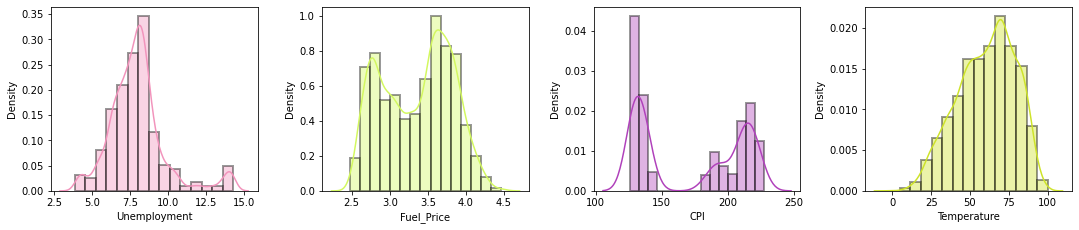

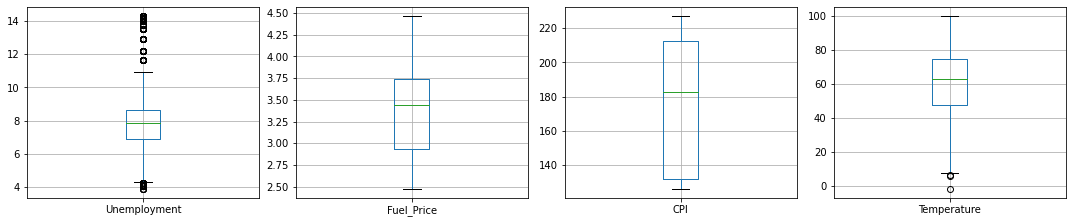

In [444]:
#Visualising the numeric features 

print('\033[1mNumeric Features Distribution'.center(130))

n=4

clr=['r','g','b','g','b','r']

plt.figure(figsize=[15,6*math.ceil(len(num_f)/n)])
for i in range(len(num_f)):
    plt.subplot(math.ceil(len(num_f)/3),n,i+1)
    sns.distplot(sales[num_f[i]],hist_kws=dict(edgecolor="black", linewidth=2), bins=15, color=list(np.random.randint([255,255,255])/255))
plt.tight_layout()
plt.show()

plt.figure(figsize=[15,6*math.ceil(len(num_f)/n)])
for i in range(len(num_f)):
    plt.subplot(math.ceil(len(num_f)/3),n,i+1)
    sales.boxplot(num_f[i])
plt.tight_layout()
plt.show()

**Findings:** 

* There seem to be some outliers in a few numerical features. It is better to fix these before model building for a better model. Well do that as part of "Data Preprocessing" Section

* CPI follows a Bi-Modal distribution, hence one needs to be careful that the model algorythm should support such features. For this case, it is okay since Linear Regression is not impacted by such distribution. 

* All other features follow Normal Distrubution. 


### <center> Bi-Variate Analysis of Numerical features to check for collinearity

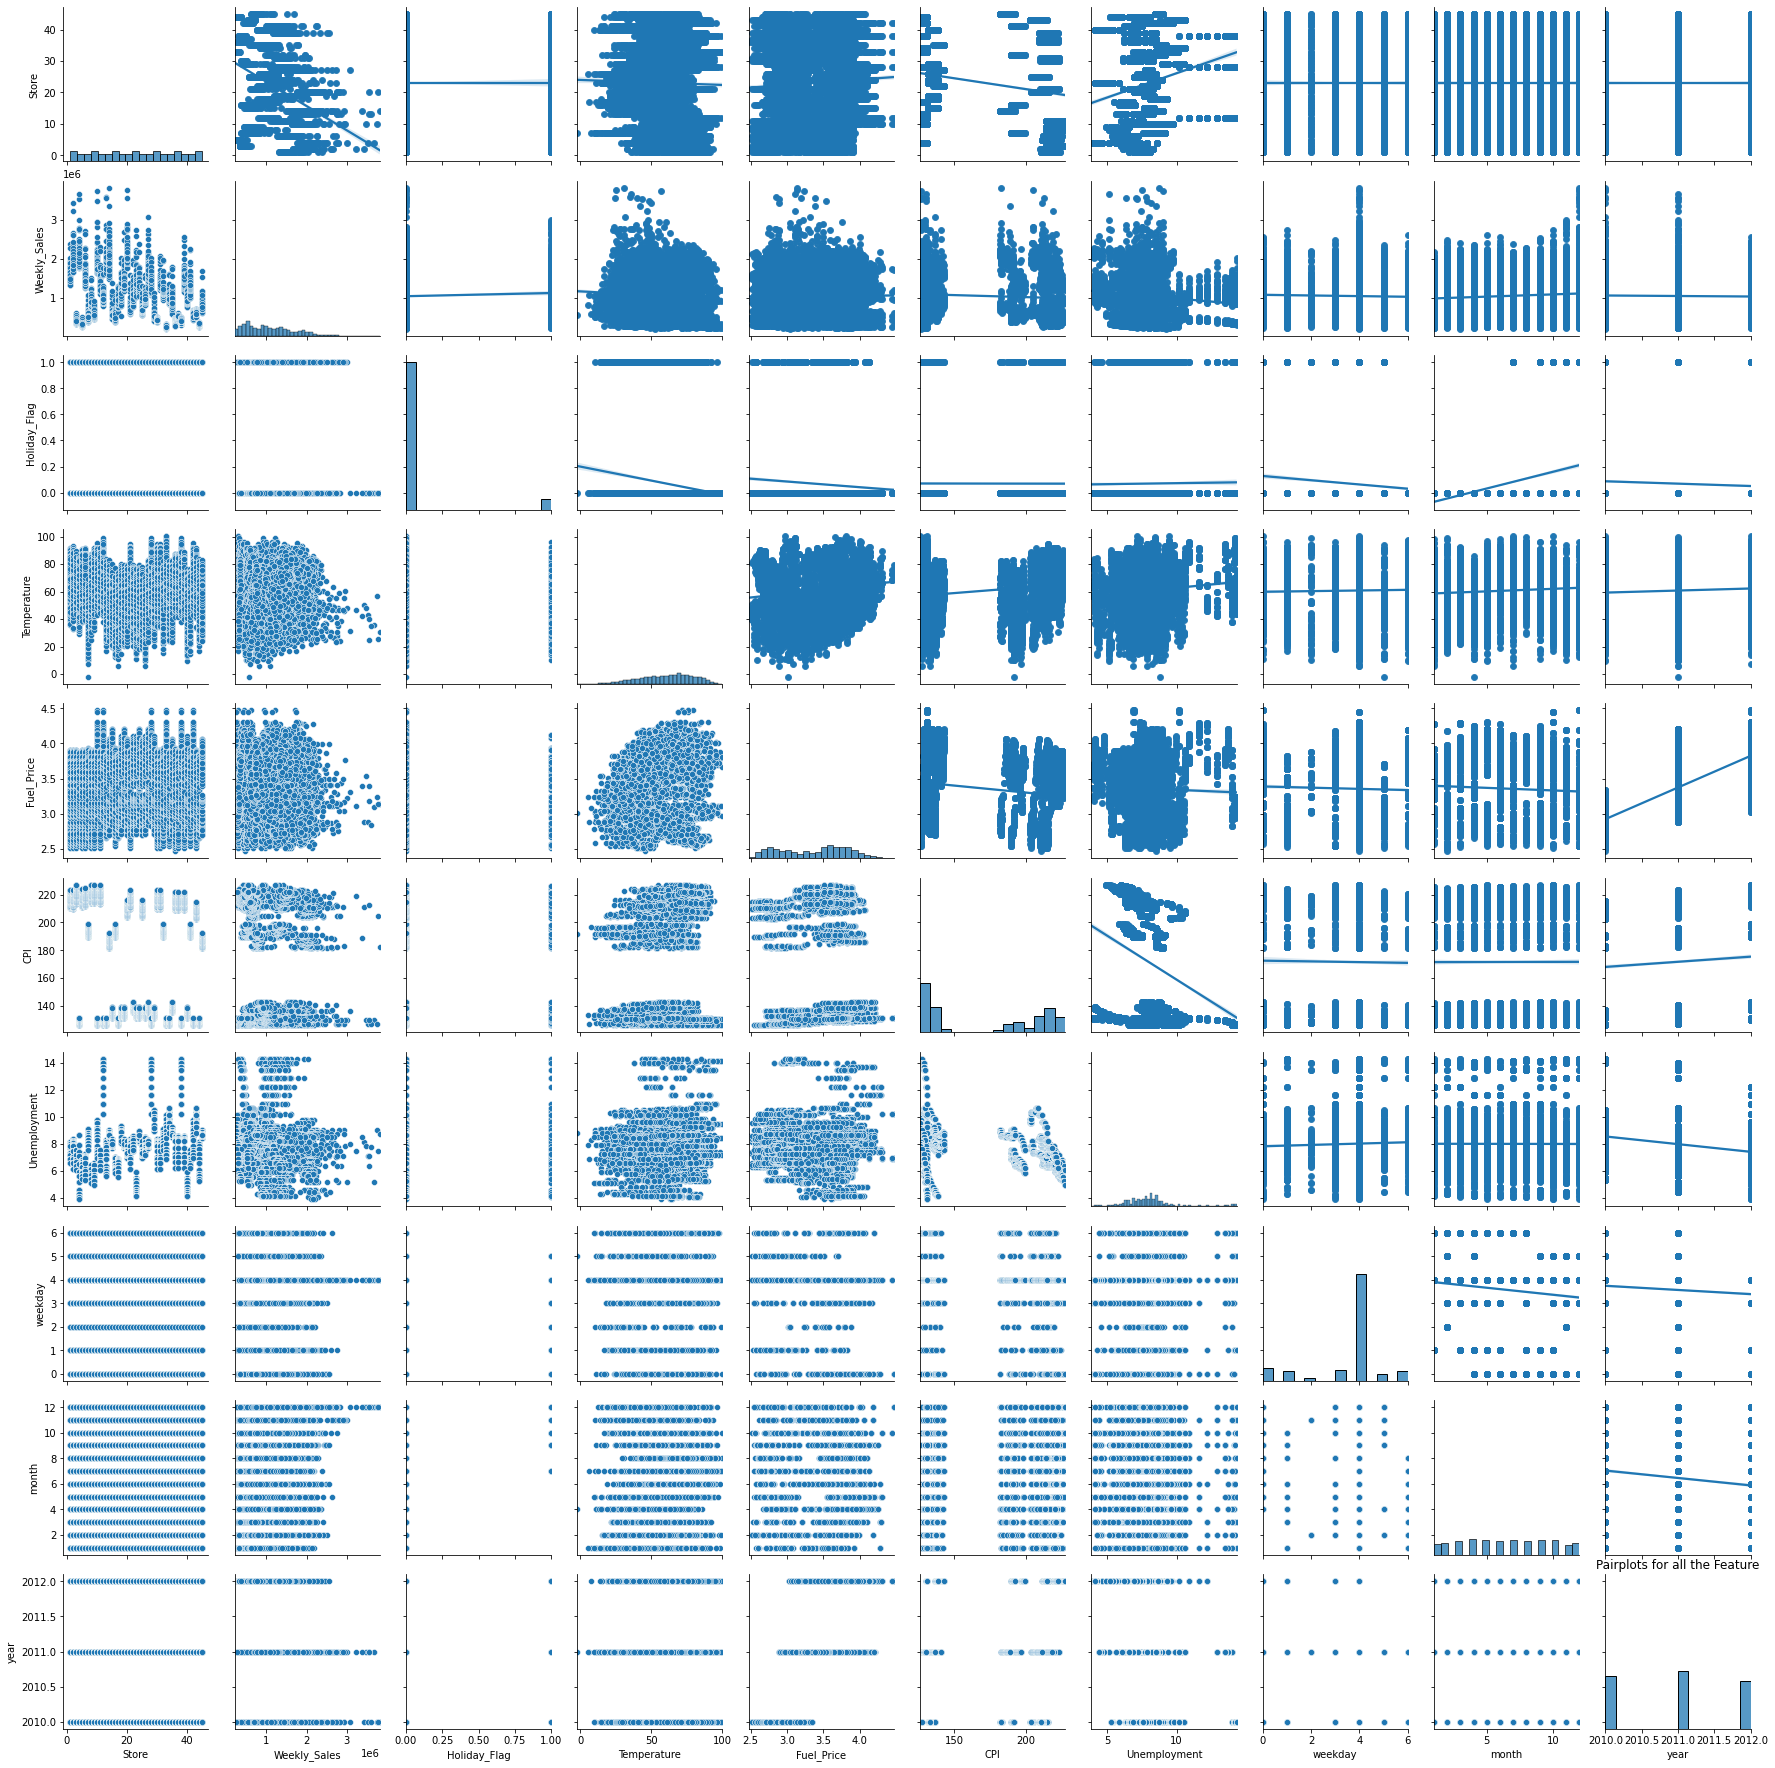

In [445]:
pair_plot = sns.pairplot(sales)
plt.title('Pairplots for all the Feature')
pair_plot.map_upper(sns.regplot)
plt.show()


**Findings:** 



It is important that feature set doesn't have correlated variables. specially in linear regression. We'll later remove these features also in Feature selection section. 

Some features in the above plot seem to be correlated. Let's check this further by plotting correlation using Heatmap. 


##### Collinearity Check | Heatmap

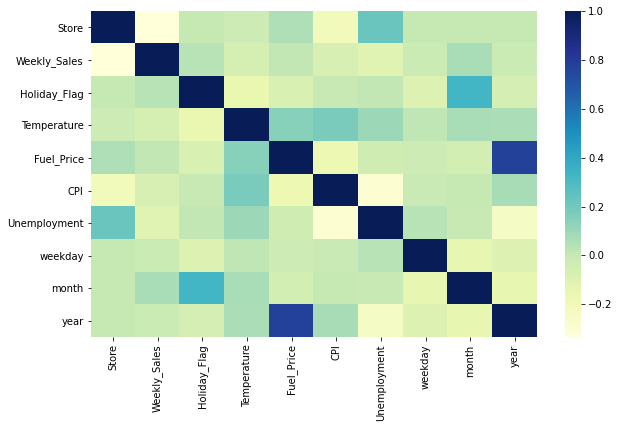

In [446]:
heatmap_data=sales.corr()
_=sns.heatmap(heatmap_data, cmap='YlGnBu')

We can confirm that a lot of pairs have high correlation among them. Thus, we'll need to address multicollinearity in the data, which will be done in upcoming section.

### <center> Bi-variate analysis of sales across different categorical features

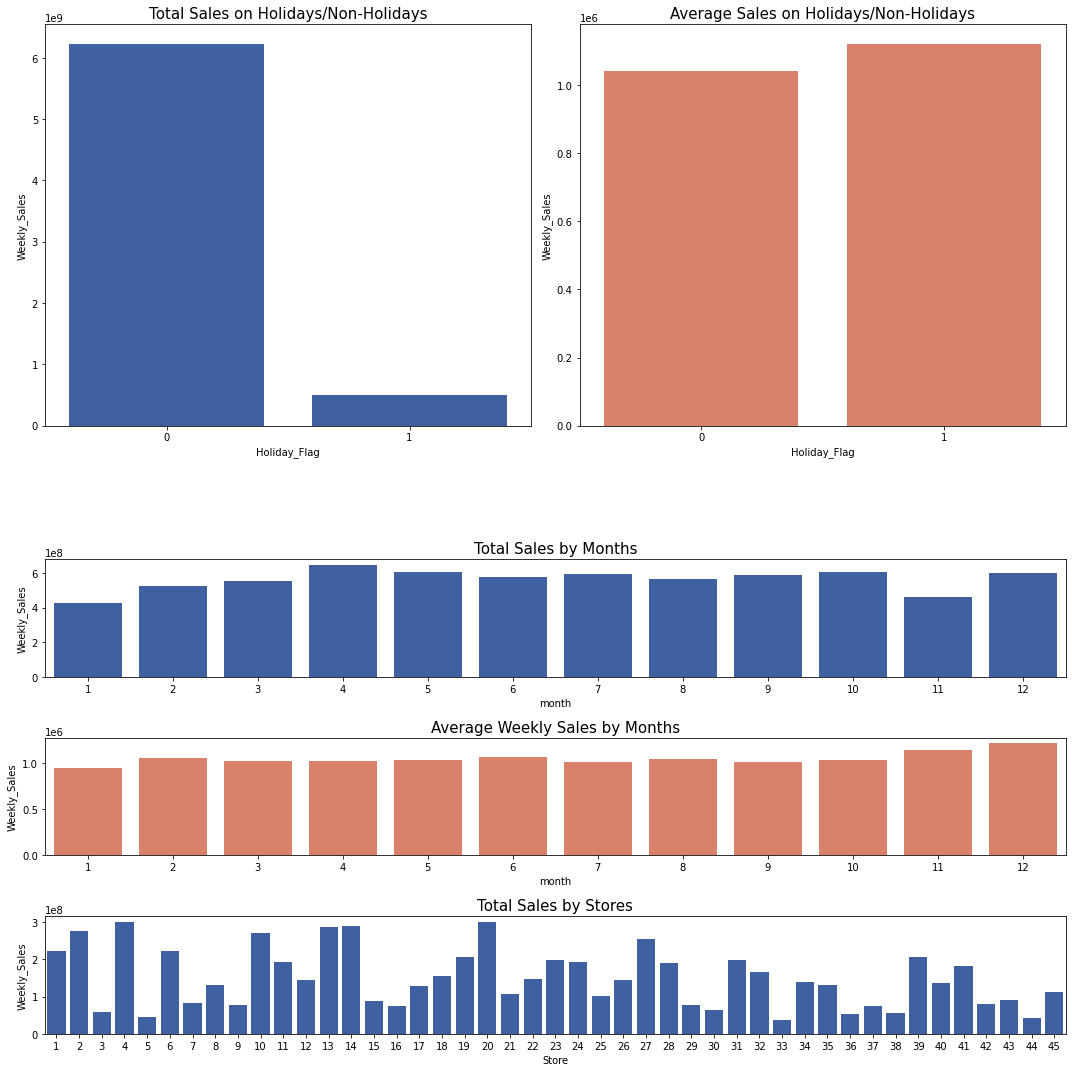

In [447]:
# NOTE : "Average" metrics are plotted in Pink and "Totals" in Blue for better visual aid


plt.figure(figsize=[15,15])                                                              # redefining figure size 
                                                                                         # as we are using subplots

# Plot 1 : Total Sales across Holidays/ Non_holidays -------------------------------------------------------------------------
plt.subplot(221)                                                      # Plot 1
grouped_sales = sales[['Holiday_Flag','Weekly_Sales']].groupby('Holiday_Flag').sum()     # Grouping by Holiday_Flag and 
                                                                                         # calculating sum of sales by holiday flag
    
sns.barplot(y='Weekly_Sales', x=grouped_sales.index, color="#305cb0",data=grouped_sales) # Plotting barplot of Sales vs holiday flag
plt.title('Total Sales on Holidays/Non-Holidays', size = 15)                             # Giving title to plot


# Plot 2 : Average Weekly Sales across Holidays/ Non_holidays ----------------------------------------------------------------
plt.subplot(222)                                                     # Plot 2
grouped_sales_sum = sales[['Holiday_Flag','Weekly_Sales']].groupby('Holiday_Flag').sum() # Grouping by Holiday_Flag and 
                                                                                         # calculating sum of sales by holiday flag
    
grouped_sales_count = sales[['Holiday_Flag','Weekly_Sales']].groupby('Holiday_Flag').count() # Grouping by Holiday_Flag and 
                                                                                             # calculating  count of rows by holiday flag
    
avg_weekly_sales = grouped_sales_sum['Weekly_Sales']/grouped_sales_count['Weekly_Sales'] # calculating average by dividing sum
                                                                                         #  by total rows
    
sns.barplot(y=avg_weekly_sales, x=grouped_sales_sum.index, color="#ed7658")              # Plotting barplot of Average Weekly Sales
                                                                                         # vs holiday flag
plt.title('Average Sales on Holidays/Non-Holidays', size = 15)                           # Giving title to plot

# Plot 3 : Total Sales across Months ----------------------------------------------------------------------------------------
plt.subplot(614)                                                     # Plot 3
grouped_sales = sales[['month','Weekly_Sales']].groupby('month').sum()                   # Grouping by month and 
                                                                                         # calculating sum of sales by month flag
sns.barplot(y='Weekly_Sales', x=grouped_sales.index, color="#305cb0",data=grouped_sales) # Plotting barplot of Sales vs months
plt.title('Total Sales by Months', size = 15)                                            # Giving title to plot


# Plot 4 : Average Weekly Sales across Months -------------------------------------------------------------------------------
plt.subplot(615)                                                     # Plot 4

grouped_sales_sum = sales[['month','Weekly_Sales']].groupby('month').sum()               # Grouping by month and 
                                                                                         # calculating sum of sales by month
    
grouped_sales_count = sales[['month','Weekly_Sales']].groupby('month').count()           # Grouping by month and 
                                                                                         # calculating  count of rows by month
avg_weekly_sales = grouped_sales_sum['Weekly_Sales']/grouped_sales_count['Weekly_Sales'] # calculating average by dividing sum
                                                                                         #  by total rows

sns.barplot(y=avg_weekly_sales, x=grouped_sales_sum.index, color="#ed7658")              # Plotting barplot of Avg Weekly Sales
                                                                                         # vs months
plt.title('Average Weekly Sales by Months', size = 15)                                   # Giving title to plot

# Plot 5 : Total Sales across Stores --------------------------------------------------------------------------------------

plt.subplot(616)                                                     # Plot 5

grouped_sales_sum = sales[['Store','Weekly_Sales']].groupby('Store').sum()               # Grouping by Store and 
                                                                                         # calculating  sum of sales by Store
sns.barplot(y='Weekly_Sales', x=grouped_sales_sum.index, color="#305cb0",data=grouped_sales_sum) 
                                                                                         # Plotting barplot of Sales across Stores
plt.title('Total Sales by Stores', size = 15)                                            # Giving title to plot

plt.tight_layout()                                                                       # to adjust plot boundaries 


**Insights** :

* Although 90+ % of the sales are from Non_holidays but the average weekly sales are higher for Holiday period by about 10%. ( Plot 1 & 2)

* Although in terms of total sales-  April,July,September,October and December show better performance. But since we have uneven data across months, it is more useful to look at "Average sales" rather than totals, which are shown in plot 4. 

* As per average sale by months plot, average sales are higher in November and December. ( Which is expected because of holidays in Nov and Dec). Feb, June and August also show good results. 

* Despite holiday in september, the sales are not impacted significantly

* Thus we can conclude that month and holiday flag are going to be crucial feature in our model. 

* As per the last plot, we can see that sales number vary a lot as per the store. Thus, it can be a significant feature in our model. 


---

# <center> 3. Feature Engineering and Feature Selection

### <center> Feature Engineering | One Hot Encoding

In [448]:
categories_dummy = pd.DataFrame()
for category in cat_f:
    categories_dummy = pd.concat([categories_dummy,pd.get_dummies(sales[category],drop_first=False,prefix=str(category))],axis=1)
categories_dummy.head(50)
        
categories_dummy.shape

# Note: we have already discussed One-hot encoding concept and practiced the same in last session

(6435, 69)

In [449]:
# below function is used to always show all the columns of a datafrome without truncation
pd.pandas.set_option('display.max_columns', None)


categories_dummy.head()

,Holiday_Flag_0,Holiday_Flag_1,year_2010,year_2011,year_2012,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,Store_1,Store_2,Store_3,Store_4,Store_5,Store_6,Store_7,Store_8,Store_9,Store_10,Store_11,Store_12,Store_13,Store_14,Store_15,Store_16,Store_17,Store_18,Store_19,Store_20,Store_21,Store_22,Store_23,Store_24,Store_25,Store_26,Store_27,Store_28,Store_29,Store_30,Store_31,Store_32,Store_33,Store_34,Store_35,Store_36,Store_37,Store_38,Store_39,Store_40,Store_41,Store_42,Store_43,Store_44,Store_45
0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [450]:
# Merging dummies with main data

sales_dummy = pd.concat([sales,categories_dummy],axis=1)
sales_dummy.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,weekday,month,year,Holiday_Flag_0,Holiday_Flag_1,year_2010,year_2011,year_2012,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,Store_1,Store_2,Store_3,Store_4,Store_5,Store_6,Store_7,Store_8,Store_9,Store_10,Store_11,Store_12,Store_13,Store_14,Store_15,Store_16,Store_17,Store_18,Store_19,Store_20,Store_21,Store_22,Store_23,Store_24,Store_25,Store_26,Store_27,Store_28,Store_29,Store_30,Store_31,Store_32,Store_33,Store_34,Store_35,Store_36,Store_37,Store_38,Store_39,Store_40,Store_41,Store_42,Store_43,Store_44,Store_45
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,6,5,2010,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,3,12,2010,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,4,2,2010,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,4,2,2010,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,0,5,2010,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### <center> Feature Engineering | Outlier Treatment

In [451]:
#Removal of outlier:

sales_new = sales_dummy.copy()


for i in num_f:
    quartile1 = sales_dummy_no_outlier[i].quantile(0.25)
    quartile3 = sales_dummy_no_outlier[i].quantile(0.75)
    inter_quartile_range = quartile3 -quartile1
    sales_new = sales_new[sales_new[i] <= (quartile3+(1.5*inter_quartile_range))]
    sales_new = sales_new[sales_new[i] >= (quartile1-(1.5*inter_quartile_range))]
    sales_new = sales_new.reset_index(drop=True)
display(sales_new.head())

print('Before outlier removal, the dataset had {} rows'.format(sales_dummy.shape[0]))
print('After outlier removal, the dataset has {} rows'.format(sales_new.shape[0]))

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,weekday,month,year,Holiday_Flag_0,Holiday_Flag_1,year_2010,year_2011,year_2012,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,Store_1,Store_2,Store_3,Store_4,Store_5,Store_6,Store_7,Store_8,Store_9,Store_10,Store_11,Store_12,Store_13,Store_14,Store_15,Store_16,Store_17,Store_18,Store_19,Store_20,Store_21,Store_22,Store_23,Store_24,Store_25,Store_26,Store_27,Store_28,Store_29,Store_30,Store_31,Store_32,Store_33,Store_34,Store_35,Store_36,Store_37,Store_38,Store_39,Store_40,Store_41,Store_42,Store_43,Store_44,Store_45
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,6,5,2010,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,3,12,2010,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,4,2,2010,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,4,2,2010,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,0,5,2010,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Before outlier removal, the dataset had 6435 rows
After outlier removal, the dataset has 5875 rows


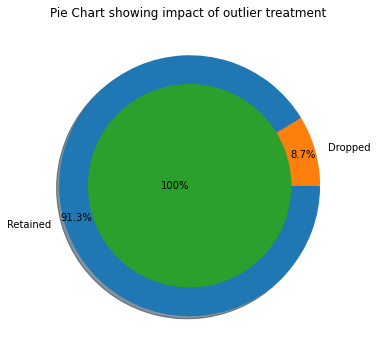

In Outlier Treatment, 560 samples were dropped, while reatining 91.3% of the rows.


In [452]:
# Visualising final Dataset shape after outlier removals

plt.title('Pie Chart showing impact of outlier treatment ')
plt.pie([sales_new.shape[0], original_sales.shape[0]-sales_new.shape[0]], radius = 1, labels=['Retained','Dropped'], counterclock=False, 
        autopct='%1.1f%%', pctdistance=0.9, explode=[0,0], shadow=True)

plt.pie([sales_new.shape[0]], labels=['100%'], labeldistance=-0, radius=0.78)

plt.show()

print(f'In Outlier Treatment, {original_sales.shape[0]-sales_new.shape[0]} samples were dropped, \
while reatining {round(100 - ((original_sales.shape[0]-sales_new.shape[0])*100/(original_sales.shape[0])),2)}% of the rows.')

---

### <center> Feature Engineering | Standardization

In [453]:
#Feature Scaling (Standardization)

#Splitting the data intro training & testing sets
X = sales_new.drop([target],axis=1)
Y = sales_new[target]

Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y, train_size=0.75, test_size=0.25, random_state=150)

Train_X.reset_index(drop=True,inplace=True)

print('Data before Train/Test Split  ---> ',X.shape,Y.shape,'\nTrain dataset  ---> ', 
      Train_X.shape,Train_Y.shape,'\nTest dataset   ---> ', Test_X.shape,'', Test_Y.shape)


# Standardization

std = StandardScaler()

print('\033[1mStandardardization on Train dataset'.center(100))
Train_X_std = std.fit_transform(Train_X)
Train_X_std = pd.DataFrame(Train_X_std, columns=X.columns)
display(Train_X_std.describe())

print('\n','\033[1mStandardardization on Test dataset'.center(100))
Test_X_std = std.transform(Test_X)
Test_X_std = pd.DataFrame(Test_X_std, columns=X.columns)
display(Test_X_std.describe())


Data before Train/Test Split  --->  (5875, 78) (5875,) 
Train dataset  --->  (4406, 78) (4406,) 
Test dataset   --->  (1469, 78)  (1469,)
                              Standardardization on Train dataset                               


,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,weekday,month,year,Holiday_Flag_0,Holiday_Flag_1,year_2010,year_2011,year_2012,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,Store_1,Store_2,Store_3,Store_4,Store_5,Store_6,Store_7,Store_8,Store_9,Store_10,Store_11,Store_12,Store_13,Store_14,Store_15,Store_16,Store_17,Store_18,Store_19,Store_20,Store_21,Store_22,Store_23,Store_24,Store_25,Store_26,Store_27,Store_28,Store_29,Store_30,Store_31,Store_32,Store_33,Store_34,Store_35,Store_36,Store_37,Store_38,Store_39,Store_40,Store_41,Store_42,Store_43,Store_44,Store_45
count,4.406000e+03,4.406000e+03,4.406000e+03,4.406000e+03,4.406000e+03,4.406000e+03,4.406000e+03,4.406000e+03,4.406000e+03,4.406000e+03,4.406000e+03,4.406000e+03,4.406000e+03,4.406000e+03,4.406000e+03,4.406000e+03,4.406000e+03,4.406000e+03,4.406000e+03,4.406000e+03,4.406000e+03,4.406000e+03,4.406000e+03,4.406000e+03,4.406000e+03,4.406000e+03,4.406000e+03,4.406000e+03,4.406000e+03,4.406000e+03,4.406000e+03,4.406000e+03,4.406000e+03,4.406000e+03,4.406000e+03,4.406000e+03,4.406000e+03,4.406000e+03,4.406000e+03,4.406000e+03,4.406000e+03,4.406000e+03,4.406000e+03,4.406000e+03,4.406000e+03,4.406000e+03,4.406000e+03,4.406000e+03,4.406000e+03,4.406000e+03,4.406000e+03,4.406000e+03,4.406000e+03,4.406000e+03,4.406000e+03,4.406000e+03,4.406000e+03,4.406000e+03,4.406000e+03,4.406000e+03,4.406000e+03,4.406000e+03,4.406000e+03,4.406000e+03,4.406000e+03,4.406000e+03,4.406000e+03,4.406000e+03,4.406000e+03,4.406000e+03,4.406000e+03,4.406000e+03,4.406000e+03,4.406000e+03,4.406000e+03,4.406000e+03,4.406000e+03,4.406000e+03
mean,-4.117350e-17,-2.850396e-16,7.708377e-17,7.879409e-16,6.837220e-16,-1.224068e-15,-6.534844e-16,-6.223901e-17,6.115469e-14,2.809071e-16,-2.850396e-16,1.394456e-16,2.415982e-16,-9.187184e-17,-1.397984e-16,-6.149315e-16,-6.827708e-16,3.749711e-16,1.156083e-16,-2.881263e-16,4.865730e-16,-2.482505e-16,6.310834e-16,-2.865766e-16,3.826061e-16,-3.719222e-17,-3.530993e-16,-3.217278e-16,2.849892e-16,1.629553e-16,-3.486645e-16,8.212022e-17,4.535637e-17,-9.140189e-16,-8.684736e-16,-6.947461e-16,1.084874e-15,-3.181875e-16,-1.439762e-15,-1.879517e-16,-2.741666e-16,-5.911446e-17,2.428329e-16,-5.316270e-16,-7.806492e-17,6.191018e-16,-2.324640e-16,-1.029741e-15,8.317097e-16,-3.219168e-16,2.261267e-16,7.246498e-16,-3.206443e-17,-4.533999e-16,1.540479e-16,-7.053419e-16,-5.794276e-17,2.520932e-16,4.093790e-16,-4.070230e-16,2.171215e-16,3.832487e-16,2.950180e-16,6.591414e-16,2.757037e-16,-6.056335e-17,-1.091627e-15,-1.528887e-16,-8.938732e-16,3.166630e-16,6.338851e-16,-1.646310e-16,3.544285e-16,4.729535e-16,1.560259e-16,1.664201e-16,-5.902879e-16,-3.514614e-16
std,1.000114e+00,1.000114e+00,1.000114e+00,1.000114e+00,1.000114e+00,1.000114e+00,1.000114e+00,1.000114e+00,1.000114e+00,1.000114e+00,1.000114e+00,1.000114e+00,1.000114e+00,1.000114e+00,1.000114e+00,1.000114e+00,1.000114e+00,1.000114e+00,1.000114e+00,1.000114e+00,1.000114e+00,1.000114e+00,1.000114e+00,1.000114e+00,1.000114e+00,1.000114e+00,1.000114e+00,1.000114e+00,1.000114e+00,1.000114e+00,1.000114e+00,1.000114e+00,1.000114e+00,1.000114e+00,1.000114e+00,1.000114e+00,1.000114e+00,1.000114e+00,1.000114e+00,1.000114e+00,1.000114e+00,1.000114e+00,1.000114e+00,1.000114e+00,1.000114e+00,1.000114e+00,1.000114e+00,1.000114e+00,1.000114e+00,1.000114e+00,1.000114e+00,1.000114e+00,1.000114e+00,1.000114e+00,1.000114e+00,1.000114e+00,1.000114e+00,1.000114e+00,1.000114e+00,1.000114e+00,1.000114e+00,1.000114e+00,1.000114e+00,1.000114e+00,1.000114e+00,1.000114e+00,1.000114e+00,1.000114e+00,1.000114e+00,1.000114e+00,1.000114e+00,1.000114e+00,1.000114e+00,1.000114e+00,1.000114e+00,1.000114e+00,1.000114e+00,1.000114e+00
min,-1.663030e+00,-2.673912e-01,-2.958016e+00,-1.898385e+00,-1.259415e+00,-2.635812e+00,-2.527846e+00,-1.647198e+00,-1.200948e+00,-3.739839e+00,-2.673912e-01,-7.170002e-01,-7.618033e-01,-6.441277e-


                                Standardardization on Test dataset                               


,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,weekday,month,year,Holiday_Flag_0,Holiday_Flag_1,year_2010,year_2011,year_2012,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,Store_1,Store_2,Store_3,Store_4,Store_5,Store_6,Store_7,Store_8,Store_9,Store_10,Store_11,Store_12,Store_13,Store_14,Store_15,Store_16,Store_17,Store_18,Store_19,Store_20,Store_21,Store_22,Store_23,Store_24,Store_25,Store_26,Store_27,Store_28,Store_29,Store_30,Store_31,Store_32,Store_33,Store_34,Store_35,Store_36,Store_37,Store_38,Store_39,Store_40,Store_41,Store_42,Store_43,Store_44,Store_45
count,1469.000000,1469.000000,1469.000000,1469.000000,1469.000000,1469.000000,1469.000000,1469.000000,1469.000000,1469.000000,1469.000000,1469.000000,1469.000000,1469.000000,1469.000000,1469.000000,1469.000000,1469.000000,1469.000000,1469.000000,1469.000000,1469.000000,1469.000000,1469.000000,1469.000000,1469.000000,1469.000000,1469.000000,1469.000000,1469.000000,1469.000000,1469.000000,1469.000000,1469.000000,1469.000000,1469.000000,1469.000000,1469.000000,1469.000000,1469.000000,1469.000000,1469.000000,1469.000000,1469.000000,1469.000000,1469.000000,1469.000000,1469.000000,1469.000000,1469.000000,1469.000000,1469.000000,1469.000000,1469.000000,1469.000000,1469.000000,1469.000000,1469.000000,1469.000000,1469.000000,1469.000000,1469.000000,1469.000000,1469.000000,1469.000000,1469.000000,1469.000000,1469.000000,1469.000000,1469.000000,1.469000e+03,1469.000000,1469.000000,1469.000000,1469.000000,1469.000000,1469.000000,1469.000000
mean,-0.018686,0.051769,-0.030094,-0.046287,0.039046,0.024816,-0.007299,0.025180,-0.035990,-0.051769,0.051769,0.030504,-0.000644,-0.031049,0.016407,-0.000059,0.007679,-0.006273,-0.020636,0.026248,0.003655,0.007971,-0.018624,-0.004154,0.005289,-0.006342,-0.018863,-0.000072,-0.003341,-0.000861,-0.024313,0.021664,0.048345,0.013354,0.013354,-0.010262,-0.027452,0.056897,0.013354,-0.031753,0.019396,0.001438,-0.027428,0.013354,0.042606,-0.033052,-0.010262,0.013354,0.001438,-0.021756,0.069908,-0.004438,0.019396,0.007369,0.037870,-0.055137,-0.010262,-0.044157,0.044149,-0.071136,-0.000006,0.025495,-0.016034,0.063369,0.037870,-0.021756,0.013354,-0.021756,0.013354,0.001438,-3.014428e-02,0.007369,0.017175,-0.033052,-0.027428,-0.010262,0.013354,-0.021756
std,0.995937,1.085305,1.010217,1.001829,1.004235,1.016907,1.017780,1.016160,0.997837,1.085305,1.085305,1.010167,1.000163,0.985644,1.026573,1.000235,1.031515,0.989723,1.007699,1.058989,1.006840,1.013724,0.970533,0.994090,1.007498,0.991349,0.971493,1.000238,0.995309,0.999112,0.965306,1.038915,1.074804,1.041125,1.041125,0.968367,0.901414,1.168910,1.041125,0.898921,1.059300,1.004776,0.913463,1.041125,1.731657,0.895039,0.968367,1.041125,1.004776,0.931818,1.205855,0.986584,1.059300,1.022953,1.113935,0.761396,0.968367,0.857933,1.132211,0.762960,1.000227,1.077488,0.950115,1.187347,1.113935,0.931818,1.041125,0.931818,1.041125,1.004776,8.745984e-16,1.022953,1.068181,0.895039,0.913463,0.968367,1.041125,0.931818
min,-1.663030,-0.267391,-2.995758,-1.806463,-1.259415,-2.635812,-2.527846,-1.647198,-1.200948,-3.739839,-0.267391,-0.717000,-0.761803,-0.644128,-0.282669,-0.261496,-0.119468,-0.275107,-1.433694,-0.206979,-0.261000,-0.273193,-0.291928,-0.303225,-0.328012,-0.319023,-0.303225,-0.315556,-0.302779,-0.315991,-0.319886,-0.256004,-0.283605,-0.156246,-0.156246,-0.159269,-0.143583,-0.150826,-0.156246,-0.161502,-0.155482,-0.157764,-0.161502,-0.156246,-0.021310,-0.162240,-0.159269,-0.156246,-0.157764,-0.160761,-0.149244,-0.158518,-0.155482,-0.157007,-0.153170,-0.129798,-0.159269,-0.163708,-0.152392,-0.167326,-0.026103,-0.154715,-0.160016,-0.150037,-0.153170,-0.160761,-0.156246,-0.160761,-0.156246,-0.157764,-3.014428e-02,-0.157007,-0.120441,-0.162240,-0.161502,-0.159269,-0.156246,-0.160761
25%,-0.899681,-0.267391,-0.761869,-1.062330,-1.078551,-0.692996,0.294859,-0.741438,-1.200948,0.267391,-0

### <center> Feature Engineering | Feature Selection using RFE

We already know that there is multicollinearity in our data which needs to be addressed.

We will be using RFE method to drop insignificant features from our dataset. 

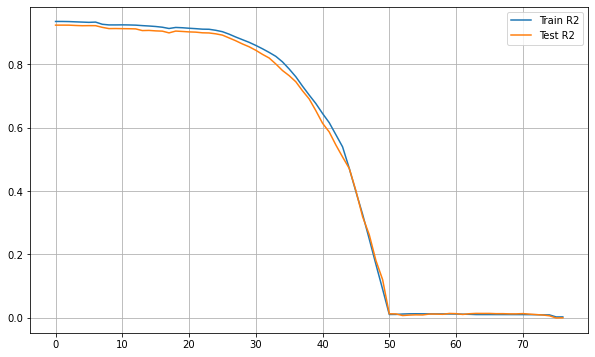

In [454]:
# Below code plots a R2 curve against number of features dropped by RFE Method. 
# We can decide on optimal number of feature after analysing the plot

from sklearn.feature_selection import RFE          # library used to reduce collinearity and feature selection

train_r2=[]
test_r2=[] 


max_features=sales_new.shape[1]-2
for i in range(max_features):                               # Running iteratively an RFE function with 
                                                            # decreasing number of features to be dropped each time
    lm = LinearRegression()
    rfe = RFE(lm,n_features_to_select=Train_X_std.shape[1]-i)       
    rfe = rfe.fit(Train_X_std, Train_Y)                     # The output of RFE.fit() will be an object. 
                                                            # ".support_" attribute of 
                                                            # that object will be an array of True/False 
                                                            # for selection/rejection of features

    LR = LinearRegression()
    LR.fit(Train_X_std.loc[:,rfe.support_], Train_Y)        # Fitting a multiple linear regression model based on RFE selected 
                                                            # features

    pred_train = LR.predict(Train_X_std.loc[:,rfe.support_])     # Predicting Target for Train set
    pred_test = LR.predict(Test_X_std.loc[:,rfe.support_])      # Predicting Target for Test set

    train_r2.append(r2_score(Train_Y, pred_train))               # R2 Score for Train set
    test_r2.append(r2_score(Test_Y, pred_test))                 # R2 Score for Test set


plt.plot(train_r2, label='Train R2')
plt.plot(test_r2, label='Test R2')

plt.legend()
plt.grid()
plt.show()

#### Finding :
It can be seen that R2 score remains fairly constant until RFE had dropped around 30 features, after which it start to decline sharply.

Hence we will be removing 30 features suggested by RFE in next step for training our MLR model. 



##### Final Feature Selection Step

In [455]:
# Final Feature Selection using RFE ( 30 features need to be dropped)

lm = LinearRegression()
rfe_features = RFE(lm,n_features_to_select=Train_X_std.shape[1]-25)            
rfe_features = rfe_features.fit(Train_X_std, Train_Y)

LR = LinearRegression()
LR.fit(Train_X_std.loc[:,rfe_features.support_], Train_Y)  # rfe_features.support_ provides an array of True/False which 
                                                           # essentially helps in selecting the best and most efficient features.


pred_train = LR.predict(Train_X_std.loc[:,rfe_features.support_])
pred_test = LR.predict(Test_X_std.loc[:,rfe_features.support_])

print(r2_score(Train_Y, pred_train))
print(r2_score(Test_Y, pred_test))


0.9032655490985166
0.8924640698171296


Thus, even after dropping 25 features, model still gives a good accuracy of about 90%

This confirms our initial understanding of colliniarity in the data

In [456]:
# Storing our new reduced data in new variables for model training 

Train_X_std_rfe = Train_X_std.loc[:,rfe_features.support_]
Test_X_std_rfe = Test_X_std.loc[:,rfe_features.support_]

---

# <center> 4. Model Training and Evaluation | Multiple Linear Regression

<img src="https://raw.githubusercontent.com/Masterx-AI/Master-AI/main/3.%20Machine%20Learning/Z-Etc/Reg/mr.png" style="width: 600px;float: left;"/>

### <center> Model Training

In [457]:
# Model Training | Multiple Linear Regression ( on reduced data after RFE )

MLR = LinearRegression().fit(Train_X_std_rfe,Train_Y)

print('{}{}\033[1m Coefficients & Intercept of Trained MLR model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))

print('\nThe Coeffecient of the MLR model is ',MLR.coef_)

print('\n\nThe Intercept of the MLR model is',MLR.intercept_)

<<<----------------------------------- Coefficients & Intercept of Trained MLR model ----------------------------------->>>


The Coeffecient of the MLR model is  [ 1.16885755e+14  7.03511619e+16  1.79924132e+14  7.37807835e+17
  3.76871735e+16  3.75702878e+16  2.88661493e+17 -1.54024189e+17
 -5.68422820e+17  3.54879149e+15 -8.83274448e+15 -1.00981621e+16
 -3.46229207e+16 -8.68166055e+16 -4.65760009e+16 -6.94732710e+16
  2.21259086e+17  2.34111330e+17  2.41659004e+17  2.57704154e+17
  2.51949175e+17  2.41613749e+17  2.49678946e+17  2.41287668e+17
  2.49929221e+17  2.52425470e+17  2.08977594e+17  2.28302534e+17
  1.57040000e+05  2.12848000e+05  2.20192000e+05  1.58880000e+05
  5.85120000e+04  2.14672000e+05  1.28176000e+05  2.35280000e+05
  2.31024000e+05  5.75520000e+04  8.15360000e+04  1.40864000e+05
  2.36576000e+05  7.69600000e+04  1.05504000e+05  1.29296000e+05
  7.16320000e+04  2.04416000e+05  1.28432000e+05  9.64960000e+04
  6.69120000e+04  6.06080000e+04  1.39616000e+05  5.10080

##### Defining a Model Evaluation function

Defining a function for giving us a complete summary of above model

NOTE: There is an another library called Statsmodels which is better in terms of providing summary of a model 
      We will also train our model with that library later in a moment

Below code picks 2 random features for our scatter plot against target , 
through which we can visualise the before-after prediction data
It is impossible to visualise all the features since we only have 3 dimensions, hence the random choice of vaiables

In [458]:
two_random_features_for_scatter =np.random.choice(Train_X_std_rfe.columns.values,2,replace=False)

#rc=np.random.choice(Train_X_std.loc[:,Train_X_std.nunique()>=50].columns.values,2,replace=False)

def Evaluation( pred_train,pred_test):
    
    # Part -1 Plotting Residual Plots & Predicted Target vs Actual Target to understand the spread
    
    print('\n{}Residual Plots{}'.format('-'*20, '-'*20))
    plt.figure(figsize=[15,4])

    plt.subplot(1,2,1)
    sns.distplot((Test_Y - pred_test))
    plt.title('Error Terms')          
    plt.xlabel('Errors') 

    plt.subplot(1,2,2)
    plt.scatter(Test_Y,pred_test)
    plt.plot([Train_Y.min(),Train_Y.max()],[Train_Y.min(),Train_Y.max()], 'r--')
    plt.title('Test vs Prediction')         
    plt.xlabel('y_test')                       
    plt.ylabel('y_pred')                       
    plt.show()
    


    # Part -2 Evaluating the Model ( by R2 )

    print('\n\n{}Training Set Evaluation{}'.format('-'*20, '-'*20))
    print('\nR2-Score on Training set --->',round(r2_score(Train_Y, pred_train),20))


    print('\n{}Testing Set Evaluation{}'.format('-'*20, '-'*20))
    print('\nR2-Score on Testing set --->',round(r2_score(Test_Y, pred_test),20))
    
    # Part -3 Plotting scatter plots for predicted data vs the real datapoints 
    plt.figure(figsize=[15,6])
    for e,i in enumerate(two_random_features_for_scatter):
        plt.subplot(2,3,e+1)
        plt.scatter(y=Train_Y, x=Train_X_std_rfe[i], label='Actual')
        plt.scatter(y=pred_train, x=Train_X_std_rfe[i], label='Prediction')
        plt.legend()
    plt.show()


### <center> Model Predition &  Evaluation 


--------------------Residual Plots--------------------


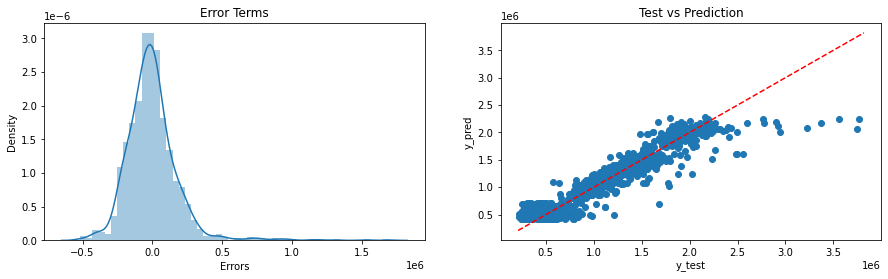



--------------------Training Set Evaluation--------------------

R2-Score on Training set ---> 0.9032655490985166

--------------------Testing Set Evaluation--------------------

R2-Score on Testing set ---> 0.8924640698171296


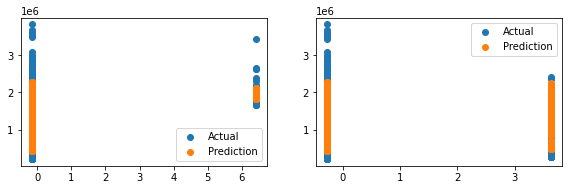

In [459]:
pred_train = MLR.predict(Train_X_std_rfe)
pred_test = MLR.predict(Test_X_std_rfe)

Evaluation(pred_train, pred_test)

Hence, we can see that the model accuracy comes out to be ~90% as we saw it durinf RFE feature selection

##### Additional Topic | Alternate Way - Model Training using Statsmodels 

In [460]:
# Multiple Linear Regression model with statsmodels

from statsmodels.formula import api                # library used for model training ( better statisics)

train_x_y = pd.concat([Train_X_std_rfe,Train_Y.reset_index(drop=True)],axis=1)

api_model = api.ols(formula='{} ~ {}'.format(target,' + '.join(str(i) for i in Train_X_std_rfe.columns)),data=train_x_y).fit()

api_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Weekly_Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     903.3
Date:                Sat, 16 Jul 2022   Prob (F-statistic):               0.00
Time:                        22:33:07   Log-Likelihood:                -59515.
No. Observations:                4406   AIC:                         1.191e+05
Df Residuals:                    4360   BIC:                         1.194e+05
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       1.061e+06   4.71e+04     22.501      0.000    9.68e+05    1.15e+06
Holiday_Flag   -6.225e+15   6.44e+16     -0.097      0.923   -1.33e+17     1.2e+17
weekday        -1.488e+17   2.58e+17     -0.577      0.564   -6.55e+17    3.57e+17
month             1.1e+17   4.23e+17      0.260      0.795   -7.18e+17    9.38e+17
year           -1.622e+17   7.68e+17     -0.211      0.833   -1.67e+18    1.34e+18
Holiday_Flag_0  3.677e+12   1.66e+16      0.000      1.000   -3.26e+16    3.26e+16
Holiday_Flag_1  6.229e+15   4.83e+16      0.129      0.897   -8.85e+16    1.01e+17
year_2010      -1.117e+17    5.3e+17     -0.211      0.833   -1.15e+18    9.28e+17
year_2011      -1.528e+16   7.41e+16     -0.206      0.837   -1.61e+17     1.3e+17
year_2012       7.855e+16   3.71e+17      0.212      0.832   -6.49e+17    8.06e+17
weekday_0      -8.847e+16   1.41e+17     -0.626      0.532   -3.66e+17    1.89e+17
weekday_1      -5.702e+16    9.1e+16     -0.627      0.531   -2.35e+17    1.21e+17
weekday_2      -1.507e+16   2.65e+16     -0.568      0.570   -6.71e+16    3.69e+16
weekday_3      -5.854e+15   4.41e+16     -0.133      0.894   -9.22e+16    8.05e+16
weekday_4       3.854e+16   1.28e+17      0.300      0.764   -2.13e+17     2.9e+17
weekday_5       3.715e+16   8.57e+16      0.433      0.665   -1.31e+17    2.05e+17
weekday_6        7.14e+16   1.48e+17      0.484      0.628   -2.18e+17    3.61e+17
month_1         4.083e+16   1.78e+17      0.230      0.818   -3.07e+17    3.89e+17
month_2         3.427e+16   1.54e+17      0.223      0.824   -2.67e+17    3.36e+17
month_3         2.615e+16   1.24e+17      0.211      0.833   -2.16e+17    2.69e+17
month_4         1.805e+16   9.47e+16      0.191      0.849   -1.68e+17    2.04e+17
month_5         8.033e+15    5.7e+16      0.141      0.888   -1.04e+17     1.2e+17
month_6         -1.52e+15   2.44e+16     -0.062      0.950   -4.93e+16    4.62e+16
month_7         -1.11e+16   2.75e+16     -0.403      0.687    -6.5e+16    4.28e+16
month_8        -1.994e+16   5.77e+16     -0.346      0.730   -1.33e+17    9.31e+16
month_9         -3.02e+16   9.52e+16     -0.317      0.751   -2.17e+17    1.56e+17
month_10       -4.014e+16   1.33e+17     -0.303      0.762      -3e+17     2.2e+17
month_11       -4.121e+16    1.4e+17     -0.294      0.769   -3.16e+17    2.34e+17
month_12       -5.375e+16   1.87e+17     -0.288      0.773   -4.19e+17    3.12e+17
Store_1         1.571e+05   2739.969     57.322      0.000    1.52e+05    1.62e+05
Store_2         2.132e+05   2998.594     71.102      0.000    2.07e+05    2.19e+05
Store_4         2.201e+05   2848.324     77.273      0.000    2.15e+05    2.26e+05
Store_6         1.591e+05   2795.801     56.897      0.000    1.54e+05    1.65e+05
Store_8         5.775e+04   3038.499     19.007      0.000    5.18e+04    6.37e+04
Store_10    

Thus, we can see that statsmodels provides model result in a very nice summarised way and a lot of our work gets reduced.

But yes, it has a bit different syntax ( similar to R), which can be a trouble sometimes for beginners. In contrast, Scikit learn is pretty much straight forward given the data is in good shape for training. 


---

# <center> 5. Summary


- The dataset was quite smaller with about 8% outliers. Hence, processing time was never a hurdle in the project.
- Through EDA we understood some relations between different variables which helped us understand the data better and give a hint that outlier treatment and feature ellimination will be required before we train the model
- Since a lot of features had colliniarity, RFE method was used to select the most efficient features.
- Finally we have our MLR model ready which can predict weekly sales as per the given input with 90% accuracy.

---